# <b><u>Telecom Churn Case Study:</b></u>
## <b>Predict churning customers for a Telecom company based on temporal behaviour</b>:
## <b><u>Aim:</b></u>
### <ol>1. To build a machine learning models to best predict whether the high-value customer will churn or not.</ol>
### <ol>2. To identify the most important variables that are strong predictors of customer churn.</ol>

## <b><u>Problem solving steps:</b></u>
### <ol>1. Initial analysis, data visualization and data cleanup.</ol>
### <ol>2. Model building using principal component analysis(PCA) with logistic regression for the Kaggle competition.</ol>
### <ol>3. Model building using principal component analysis(PCA) with random forest for the Kaggle competition.</ol>
### <ol>4. Model performance comparison and selection of the best performing model  for the Kaggle competition.</ol>
### <ol>5. Model building using logistic regression(without PCA).</ol>
### <ol>6. Model building using with random forest(without PCA).</ol>
### <ol>7. Important variable identification.</ol>



## Step 1: <b><u>Initial analysis, data visualization and data cleanup:</b></u>

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
warnings.filterwarnings('ignore')
#pd.set_option('max_row', None)
pd.set_option("max_colwidth", 100000)

In [2]:
df_telecom = pd.read_csv('train.csv')
df_telecom_unseen=pd.read_csv('test.csv')
output=df_telecom_unseen['id']
output2=df_telecom_unseen['id']
output_log=df_telecom_unseen['id']
output_rf=df_telecom_unseen['id']

In [3]:
df_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df_telecom.shape

(69999, 172)

In [5]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
df_telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
df_telecom.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

### <b>Observations:</b>

### 1.  The below features are either irrelevant or are features that are a part of a larger aggregated feature (total) that is more relevant, or predominantly contain null or zero values for most of the records:
###### <li>id</li>
###### <li>circle_id</li>
###### <li>loc_og_t2o_mou</li>
###### <li>std_og_t2o_mou</li>
###### <li>loc_ic_t2o_mou</li>
###### <li>last_date_of_month_6</li>
###### <li>last_date_of_month_7</li>
###### <li>last_date_of_month_8</li>
###### <li>loc_og_t2t_mou_6</li>	
###### <li>loc_og_t2t_mou_7</li>	
###### <li>loc_og_t2t_mou_8</li>	
###### <li>loc_og_t2m_mou_6</li>	
###### <li>loc_og_t2m_mou_7</li>	
###### <li>loc_og_t2m_mou_8</li>	
###### <li>loc_og_t2f_mou_6</li>	
###### <li>loc_og_t2f_mou_7</li>	
###### <li>loc_og_t2f_mou_8</li>	
###### <li>loc_og_t2c_mou_6</li>	
###### <li>loc_og_t2c_mou_7</li>	
###### <li>loc_og_t2c_mou_8</li>	
###### <li>loc_og_mou_6</li>	
###### <li>loc_og_mou_7</li>	
###### <li>loc_og_mou_8</li>	
###### <li>std_og_t2t_mou_6</li>	
###### <li>std_og_t2t_mou_7</li>	
###### <li>std_og_t2t_mou_8</li>	
###### <li>std_og_t2m_mou_6</li>	
###### <li>std_og_t2m_mou_7</li>	
###### <li>std_og_t2m_mou_8</li>	
###### <li>std_og_t2f_mou_6</li>	
###### <li>std_og_t2f_mou_7</li>	
###### <li>std_og_t2f_mou_8</li>	
###### <li>std_og_t2c_mou_6</li>	
###### <li>std_og_t2c_mou_7</li>	
###### <li>std_og_t2c_mou_8</li>	
###### <li>std_og_mou_6</li>	
###### <li>std_og_mou_7</li>	
###### <li>std_og_mou_8</li>	
###### <li>isd_og_mou_6</li>	
###### <li>isd_og_mou_7</li>	
###### <li>isd_og_mou_8</li>	
###### <li>spl_og_mou_6</li>	
###### <li>spl_og_mou_7</li>	
###### <li>spl_og_mou_8</li>	
###### <li>og_others_6</li>	
###### <li>og_others_7</li>	
###### <li>og_others_8</li>
###### <li>loc_ic_t2t_mou_6</li>	
###### <li>loc_ic_t2t_mou_7</li>
###### <li>loc_ic_t2t_mou_8</li>	
###### <li>loc_ic_t2m_mou_6</li>	
###### <li>loc_ic_t2m_mou_7</li>	
###### <li>loc_ic_t2m_mou_8</li>	
###### <li>loc_ic_t2f_mou_6</li>	
###### <li>loc_ic_t2f_mou_7</li>	
###### <li>loc_ic_t2f_mou_8</li>	
###### <li>loc_ic_mou_6</li>	
###### <li>loc_ic_mou_7</li>	
###### <li>loc_ic_mou_8</li>	
###### <li>std_ic_t2t_mou_6</li>	
###### <li>std_ic_t2t_mou_7</li>	
###### <li>std_ic_t2t_mou_8</li>	
###### <li>std_ic_t2m_mou_6</li>	
###### <li>std_ic_t2m_mou_7</li>	
###### <li>std_ic_t2m_mou_8</li>	
###### <li>std_ic_t2f_mou_6</li>	
###### <li>std_ic_t2f_mou_7</li>	
###### <li>std_ic_t2f_mou_8</li>	
###### <li>std_ic_t2o_mou_6</li>	
###### <li>std_ic_t2o_mou_7</li>	
###### <li>std_ic_t2o_mou_8</li>	
###### <li>std_ic_mou_6</li>	
###### <li>std_ic_mou_7</li>	
###### <li>std_ic_mou_8</li>
###### <li>spl_ic_mou_6</li>
###### <li>spl_ic_mou_7</li>
###### <li>spl_ic_mou_8</li>	
###### <li>isd_ic_mou_6</li>	
###### <li>isd_ic_mou_7</li>	
###### <li>isd_ic_mou_8</li>	
###### <li>ic_others_6</li>	
###### <li>ic_others_7</li>	
###### <li>ic_others_8</li>
###### <li>max_rech_amt_6</li>	
###### <li>max_rech_amt_7</li>	
###### <li>max_rech_amt_8</li>	
###### <li>date_of_last_rech_6</li>	
###### <li>date_of_last_rech_7</li>	
###### <li>date_of_last_rech_8</li>	
###### <li>last_day_rch_amt_6</li>	
###### <li>last_day_rch_amt_7</li>	
###### <li>last_day_rch_amt_8</li>	
###### <li>date_of_last_rech_data_6</li>	
###### <li>date_of_last_rech_data_7</li>	
###### <li>date_of_last_rech_data_8</li>
###### <li>count_rech_2g_6</li>	
###### <li>count_rech_2g_7</li>	
###### <li>count_rech_2g_8</li>	
###### <li>count_rech_3g_6</li>	
###### <li>count_rech_3g_7</li>	
###### <li>count_rech_3g_8</li>
###### <li>total_rech_data_6</li>
###### <li>total_rech_data_7</li>
###### <li>total_rech_data_8</li>
###### <li>max_rech_data_6</li>
###### <li>max_rech_data_7</li>
###### <li>max_rech_data_8</li>
###### <li>av_rech_amt_data_6</li>
###### <li>av_rech_amt_data_7</li>	
###### <li>av_rech_amt_data_8</li>
###### <li>arpu_3g_6</li>
###### <li>arpu_3g_7</li>	
###### <li>arpu_3g_8</li>	
###### <li>arpu_2g_6</li>	
###### <li>arpu_2g_7</li>	
###### <li>arpu_2g_8</li>
###### <li>night_pck_user_6</li>
###### <li>night_pck_user_7</li>
###### <li>night_pck_user_8</li>
###### <li>monthly_2g_6</li>	
###### <li>monthly_2g_7</li>	
###### <li>monthly_2g_8</li>	
###### <li>sachet_2g_6</li>	
###### <li>sachet_2g_7</li>	
###### <li>sachet_2g_8</li>	
###### <li>monthly_3g_6</li>	
###### <li>monthly_3g_7</li>	
###### <li>monthly_3g_8</li>	
###### <li>sachet_3g_6</li>	
###### <li>sachet_3g_7</li>	
###### <li>sachet_3g_8</li>
###### <li>roam_ic_mou_6</li>
###### <li>roam_ic_mou_7</li>
###### <li>roam_ic_mou_8</li>
###### <li>roam_og_mou_6</li>
###### <li>roam_og_mou_7</li>
###### <li>roam_og_mou_8</li>
###### <li>vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8</li>
###### <li>vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8</li>
###### <li>aug_vbc_3g,jul_vbc_3g,jun_vbc_3g</li>

### 2.  The below features can be combined into a single new feature using addition or average calculation, and then dropped:
###### <li>arpu_6,arpu_7,arpu_8 (average)</li>
###### <li>onnet_mou_6,onnet_mou_7,onnet_mou_8</li>
###### <li>offnet_mou_6,offnet_mou_7,offnet_mou_8</li>
###### <li>total_og_mou_6,total_og_mou_7,total_og_mou_8</li>
###### <li>total_ic_mou_6,total_ic_mou_7,total_ic_mou_8</li>
###### <li>total_rech_num_6,total_rech_num_7,total_rech_num_8</li>
###### <li>total_rech_amt_6,total_rech_amt_7,total_rech_amt_8</li>




##### 1. Dropping the columns listed in point 1 above:

In [8]:
drop_columns_1 = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','loc_og_t2t_mou_6',	'loc_og_t2t_mou_7',	'loc_og_t2t_mou_8',	'loc_og_t2m_mou_6',	'loc_og_t2m_mou_7',	'loc_og_t2m_mou_8',	'loc_og_t2f_mou_6',	'loc_og_t2f_mou_7',	'loc_og_t2f_mou_8',	'loc_og_t2c_mou_6',	'loc_og_t2c_mou_7',	'loc_og_t2c_mou_8',	'loc_og_mou_6',	'loc_og_mou_7',	'loc_og_mou_8',	'std_og_t2t_mou_6',	'std_og_t2t_mou_7',	'std_og_t2t_mou_8',	'std_og_t2m_mou_6',	'std_og_t2m_mou_7',	'std_og_t2m_mou_8',	'std_og_t2f_mou_6',	'std_og_t2f_mou_7',	'std_og_t2f_mou_8',	'std_og_t2c_mou_6',	'std_og_t2c_mou_7',	'std_og_t2c_mou_8',	'std_og_mou_6',	'std_og_mou_7',	'std_og_mou_8',	'isd_og_mou_6',	'isd_og_mou_7',	'isd_og_mou_8',	'spl_og_mou_6',	'spl_og_mou_7',	'spl_og_mou_8',	'og_others_6',	'og_others_7',	'og_others_8','loc_ic_t2t_mou_6',	'loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',	'loc_ic_t2m_mou_6',	'loc_ic_t2m_mou_7',	'loc_ic_t2m_mou_8',	'loc_ic_t2f_mou_6',	'loc_ic_t2f_mou_7',	'loc_ic_t2f_mou_8',	'loc_ic_mou_6',	'loc_ic_mou_7',	'loc_ic_mou_8',	'std_ic_t2t_mou_6',	'std_ic_t2t_mou_7',	'std_ic_t2t_mou_8',	'std_ic_t2m_mou_6',	'std_ic_t2m_mou_7',	'std_ic_t2m_mou_8',	'std_ic_t2f_mou_6',	'std_ic_t2f_mou_7',	'std_ic_t2f_mou_8',	'std_ic_t2o_mou_6',	'std_ic_t2o_mou_7',	'std_ic_t2o_mou_8',	'std_ic_mou_6',	'std_ic_mou_7',	'std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',	'isd_ic_mou_6',	'isd_ic_mou_7',	'isd_ic_mou_8',	'ic_others_6',	'ic_others_7',	'ic_others_8','max_rech_amt_6',	'max_rech_amt_7',	'max_rech_amt_8',	'date_of_last_rech_6',	'date_of_last_rech_7',	'date_of_last_rech_8',	'last_day_rch_amt_6',	'last_day_rch_amt_7',	'last_day_rch_amt_8',	'date_of_last_rech_data_6',	'date_of_last_rech_data_7',	'date_of_last_rech_data_8','count_rech_2g_6',	'count_rech_2g_7',	'count_rech_2g_8',	'count_rech_3g_6',	'count_rech_3g_7',	'count_rech_3g_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7',	'av_rech_amt_data_8','arpu_3g_6','arpu_3g_7',	'arpu_3g_8',	'arpu_2g_6',	'arpu_2g_7',	'arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_2g_6',	'monthly_2g_7',	'monthly_2g_8',	'sachet_2g_6',	'sachet_2g_7',	'sachet_2g_8',	'monthly_3g_6',	'monthly_3g_7',	'monthly_3g_8',	'sachet_3g_6',	'sachet_3g_7',	'sachet_3g_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']

In [9]:
df_telecom.shape

(69999, 172)

In [10]:
df_telecom_unseen.shape

(30000, 171)

In [11]:
df_telecom.drop(columns=drop_columns_1,inplace=True)
df_telecom.shape

(69999, 26)

In [12]:
df_telecom_unseen.drop(columns=drop_columns_1,inplace=True)
df_telecom_unseen.shape

(30000, 25)

##### 2. Combining related features and creating a new feature, and dropping the original features, after data fixing/cleanup of the original features, as per point number 2 above:

##### <li>arpu_6,arpu_7,arpu_8 (average)</li>

In [13]:
df_telecom[['arpu_6','arpu_7','arpu_8']].dtypes

arpu_6    float64
arpu_7    float64
arpu_8    float64
dtype: object

In [14]:
df_telecom[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826
std,334.213918,344.366927,351.924315
min,-2258.709000,-1289.715000,-945.808000
25%,93.581000,86.714000,84.095000
50%,197.484000,191.588000,192.234000
75%,370.791000,365.369500,369.909000
max,27731.088000,35145.834000,33543.624000


In [15]:
df_telecom_unseen[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,30000.000000,30000.000000,30000.000000
mean,282.644348,279.355021,279.845167
std,314.560212,323.205370,326.437029
min,-185.043000,-2014.045000,-146.859000
25%,92.907500,87.504750,84.180500
50%,198.227500,191.775000,191.690500
75%,371.969250,365.250750,367.804750
max,10955.066000,13224.119000,13505.996000


##### Converting all negative values to positive ones:

In [16]:
def toPositive(x):
    if x<0:
        return abs(x)
    return x


df_telecom.arpu_6=df_telecom.arpu_6.apply(toPositive)
df_telecom.arpu_7=df_telecom.arpu_7.apply(toPositive)
df_telecom.arpu_8=df_telecom.arpu_8.apply(toPositive)

In [17]:
df_telecom_unseen.arpu_6=df_telecom_unseen.arpu_6.apply(toPositive)
df_telecom_unseen.arpu_7=df_telecom_unseen.arpu_7.apply(toPositive)
df_telecom_unseen.arpu_8=df_telecom_unseen.arpu_8.apply(toPositive)

In [18]:
df_telecom['arpu']=(df_telecom['arpu_6']+df_telecom['arpu_7']+df_telecom['arpu_8'])/3
df_telecom_unseen['arpu']=(df_telecom_unseen['arpu_6']+df_telecom_unseen['arpu_7']+df_telecom_unseen['arpu_8'])/3

##### <li>onnet_mou_6,onnet_mou_7,onnet_mou_8</li>

In [19]:
df_telecom[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257
std,299.963093,311.277193,311.896596
min,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000
50%,34.110000,32.280000,32.100000
75%,119.390000,115.837500,115.060000
max,7376.710000,8157.780000,10752.560000


In [20]:
df_telecom[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].isnull().sum()

onnet_mou_6    2768
onnet_mou_7    2687
onnet_mou_8    3703
dtype: int64

In [21]:
df_telecom[['onnet_mou_6','onnet_mou_7','onnet_mou_8']]=df_telecom[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].fillna(0)

In [22]:
df_telecom[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,69999.000000,69999.000000,69999.000000
mean,127.887939,128.754731,125.943607
std,295.115497,306.326345,304.990552
min,0.000000,0.000000,0.000000
25%,5.430000,4.910000,4.110000
50%,30.830000,29.160000,27.840000
75%,113.100000,108.940000,106.280000
max,7376.710000,8157.780000,10752.560000


In [23]:
df_telecom_unseen[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,28831.000000,28828.000000,28325.000000
mean,130.629693,133.148632,133.111348
std,290.677420,302.921820,301.951806
min,0.000000,0.000000,0.000000
25%,7.280000,6.660000,6.540000
50%,34.760000,32.550000,33.060000
75%,117.170000,115.210000,117.730000
max,6944.360000,7411.010000,6723.790000


In [24]:
df_telecom_unseen[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].isnull().sum()

onnet_mou_6    1169
onnet_mou_7    1172
onnet_mou_8    1675
dtype: int64

In [25]:
df_telecom_unseen[['onnet_mou_6','onnet_mou_7','onnet_mou_8']]=df_telecom_unseen[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].fillna(0)

In [26]:
df_telecom_unseen[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,30000.000000,30000.000000,30000.000000
mean,125.539490,127.946958,125.679297
std,286.076687,298.064169,294.988494
min,0.000000,0.000000,0.000000
25%,5.410000,4.790000,4.047500
50%,31.400000,29.410000,28.480000
75%,111.517500,108.845000,108.040000
max,6944.360000,7411.010000,6723.790000


In [27]:
df_telecom['onnet_mou']=df_telecom['onnet_mou_6']+df_telecom['onnet_mou_7']+df_telecom['onnet_mou_8']
df_telecom_unseen['onnet_mou']=df_telecom_unseen['onnet_mou_6']+df_telecom_unseen['onnet_mou_7']+df_telecom['onnet_mou_8']


##### <li>offnet_mou_6,offnet_mou_7,offnet_mou_8</li>

In [28]:
df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,67231.000000,67312.000000,66296.000000
mean,198.874771,197.153383,196.543577
std,316.818355,322.482226,324.089234
min,0.000000,0.000000,0.000000
25%,34.860000,32.240000,31.575000
50%,96.480000,91.885000,91.800000
75%,232.990000,227.630000,229.345000
max,8362.360000,7043.980000,14007.340000


In [29]:
df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum()

offnet_mou_6    2768
offnet_mou_7    2687
offnet_mou_8    3703
dtype: int64

In [30]:
df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']]=df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].fillna(0)

In [31]:
df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum()

offnet_mou_6    0
offnet_mou_7    0
offnet_mou_8    0
dtype: int64

In [32]:
df_telecom[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,69999.000000,69999.000000,69999.000000
mean,191.010582,189.585401,186.146273
std,312.900706,318.492632,318.453812
min,0.000000,0.000000,0.000000
25%,28.790000,26.690000,23.780000
50%,89.810000,85.590000,83.010000
75%,223.540000,218.350000,216.410000
max,8362.360000,7043.980000,14007.340000


In [33]:
df_telecom_unseen[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,28831.000000,28828.000000,28325.000000
mean,195.745473,196.792375,196.647889
std,316.923836,333.628481,334.277643
min,0.000000,0.000000,0.000000
25%,34.385000,32.110000,31.740000
50%,95.830000,91.435000,92.810000
75%,229.230000,224.972500,225.760000
max,6962.460000,9667.130000,13547.840000


In [34]:
df_telecom_unseen[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum()

offnet_mou_6    1169
offnet_mou_7    1172
offnet_mou_8    1675
dtype: int64

In [35]:
df_telecom_unseen[['offnet_mou_6','offnet_mou_7','offnet_mou_8']]=df_telecom_unseen[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].fillna(0)

In [36]:
df_telecom_unseen[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,30000.000000,30000.000000,30000.000000
mean,188.117924,189.104353,185.668382
std,312.988297,329.261711,327.934516
min,0.000000,0.000000,0.000000
25%,28.605000,26.580000,24.025000
50%,89.280000,84.925000,83.485000
75%,220.150000,216.930000,213.745000
max,6962.460000,9667.130000,13547.840000


In [37]:
df_telecom['offnet_mou']=df_telecom['offnet_mou_6']+df_telecom['offnet_mou_7']+df_telecom['offnet_mou_8']
df_telecom_unseen['offnet_mou']=df_telecom_unseen['offnet_mou_6']+df_telecom_unseen['offnet_mou_7']+df_telecom_unseen['offnet_mou_8']

##### <li>total_og_mou_6,total_og_mou_7,total_og_mou_8</li>

In [38]:
df_telecom[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,69999.000000,69999.000000,69999.000000
mean,306.451436,310.572674,304.513065
std,465.502866,479.131770,477.936832
min,0.000000,0.000000,0.000000
25%,44.780000,42.910000,38.710000
50%,145.280000,141.230000,138.360000
75%,374.305000,380.045000,370.895000
max,10674.030000,8285.640000,14043.060000


In [39]:
df_telecom_unseen[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,30000.000000,30000.000000,30000.000000
mean,302.058108,309.434356,303.201238
std,458.514486,482.130305,478.653833
min,0.000000,0.000000,0.000000
25%,44.610000,43.325000,38.137500
50%,144.860000,142.180000,139.470000
75%,370.637500,376.560000,367.910000
max,7387.540000,11365.310000,13848.260000


In [40]:
df_telecom['total_og_mou']=df_telecom['total_og_mou_6']+df_telecom['total_og_mou_7']+df_telecom['total_og_mou_8']
df_telecom_unseen['total_og_mou']=df_telecom_unseen['total_og_mou_6']+df_telecom_unseen['total_og_mou_7']+df_telecom_unseen['total_og_mou_8']

##### <li>total_ic_mou_6,total_ic_mou_7,total_ic_mou_8</li>

In [41]:
df_telecom[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,69999.000000,69999.000000,69999.000000
mean,199.710640,201.878029,198.486034
std,290.114823,296.771338,288.336731
min,0.000000,0.000000,0.000000
25%,38.640000,41.340000,38.290000
50%,114.780000,116.330000,114.610000
75%,251.070000,249.470000,249.710000
max,7716.140000,9699.010000,10830.380000


In [42]:
df_telecom[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].dtypes

total_ic_mou_6    float64
total_ic_mou_7    float64
total_ic_mou_8    float64
dtype: object

In [43]:
df_telecom_unseen[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,30000.000000,30000.000000,30000.000000
mean,201.108615,205.128083,199.368522
std,295.209040,301.252400,291.608879
min,0.000000,0.000000,0.000000
25%,38.137500,40.860000,38.340000
50%,114.655000,116.420000,114.810000
75%,253.357500,253.272500,247.280000
max,6837.080000,5852.030000,5990.710000


In [44]:
df_telecom_unseen[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].dtypes

total_ic_mou_6    float64
total_ic_mou_7    float64
total_ic_mou_8    float64
dtype: object

In [45]:
df_telecom['total_ic_mou']= df_telecom['total_ic_mou_6']+df_telecom['total_ic_mou_7']+df_telecom['total_ic_mou_8']
df_telecom_unseen['total_ic_mou']= df_telecom_unseen['total_ic_mou_6']+df_telecom_unseen['total_ic_mou_7']+df_telecom_unseen['total_ic_mou_8']

##### <li>total_rech_num_6,total_rech_num_7,total_rech_num_8</li>

In [46]:
df_telecom[['total_rech_num_6','total_rech_num_7','total_rech_num_8']].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,69999.000000,69999.000000,69999.000000
mean,7.566522,7.706667,7.224932
std,7.041452,7.050614,7.195597
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000
50%,6.000000,6.000000,5.000000
75%,9.000000,10.000000,9.000000
max,170.000000,138.000000,138.000000


In [47]:
df_telecom_unseen[['total_rech_num_6','total_rech_num_7','total_rech_num_8']].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,30000.000000,30000.000000,30000.000000
mean,7.540800,7.685667,7.184867
std,7.163973,7.116522,7.222790
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000
50%,6.000000,6.000000,5.000000
75%,9.000000,10.000000,9.000000
max,307.000000,110.000000,196.000000


In [48]:
df_telecom_unseen[['total_rech_num_6','total_rech_num_7','total_rech_num_8']].dtypes

total_rech_num_6    int64
total_rech_num_7    int64
total_rech_num_8    int64
dtype: object

In [49]:
df_telecom[['total_rech_num_6','total_rech_num_7','total_rech_num_8']].dtypes

total_rech_num_6    int64
total_rech_num_7    int64
total_rech_num_8    int64
dtype: object

In [50]:
df_telecom['total_rech_num']=df_telecom['total_rech_num_6']+df_telecom['total_rech_num_7']+df_telecom['total_rech_num_8']
df_telecom_unseen['total_rech_num']=df_telecom_unseen['total_rech_num_6']+df_telecom_unseen['total_rech_num_7']+df_telecom_unseen['total_rech_num_8']

In [51]:
df_telecom_unseen['total_rech_num'].describe()

count    30000.000000
mean        22.411333
std         18.546232
min          0.000000
25%         11.000000
50%         17.000000
75%         27.000000
max        327.000000
Name: total_rech_num, dtype: float64

##### <li>total_rech_amt_6,total_rech_amt_7,total_rech_amt_8</li>

In [52]:
df_telecom[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].dtypes

total_rech_amt_6    int64
total_rech_amt_7    int64
total_rech_amt_8    int64
dtype: object

In [53]:
df_telecom[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355
std,404.211068,411.070120,426.181405
min,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000
50%,229.000000,220.000000,225.000000
75%,438.000000,430.000000,436.000000
max,35190.000000,40335.000000,45320.000000


In [54]:
df_telecom_unseen[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].dtypes

total_rech_amt_6    int64
total_rech_amt_7    int64
total_rech_amt_8    int64
dtype: object

In [55]:
df_telecom_unseen[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,30000.000000,30000.000000,30000.000000
mean,326.055900,324.331700,324.882233
std,383.187192,401.136032,393.132804
min,0.000000,0.000000,0.000000
25%,104.000000,100.000000,90.000000
50%,230.000000,220.000000,225.000000
75%,436.250000,426.000000,432.000000
max,18500.000000,19000.000000,14000.000000


In [56]:
df_telecom['total_rech_amt']=df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7']+df_telecom['total_rech_amt_8']
df_telecom_unseen['total_rech_amt']=df_telecom_unseen['total_rech_amt_6']+df_telecom_unseen['total_rech_amt_7']+df_telecom_unseen['total_rech_amt_8']

In [57]:
df_telecom['total_rech_amt'].describe()

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
75%        1244.000000
max      120845.000000
Name: total_rech_amt, dtype: float64

In [58]:
df_telecom_unseen['total_rech_amt'].describe()

count    30000.000000
mean       975.269833
std       1030.233604
min          0.000000
25%        360.000000
50%        686.000000
75%       1242.000000
max      51500.000000
Name: total_rech_amt, dtype: float64

##### Dropping the 2nd set of features that are not longer required for further analysis:

In [59]:
df_telecom.drop(columns=['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],inplace=True)
df_telecom_unseen.drop(columns=['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],inplace=True)

In [60]:
df_telecom.shape

(69999, 12)

In [61]:
df_telecom_unseen.shape

(30000, 11)

In [62]:
df_telecom.columns

Index(['fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'churn_probability',
       'arpu', 'onnet_mou', 'offnet_mou', 'total_og_mou', 'total_ic_mou',
       'total_rech_num', 'total_rech_amt'],
      dtype='object')

##### <li>Converting the data type of the categorical features fb_user_6,fb_user_7 and fb_user_8 to object type with imputation of null values:</li>

In [63]:
df_telecom[['fb_user_6','fb_user_7','fb_user_8']]=df_telecom[['fb_user_6','fb_user_7','fb_user_8']].astype('object')
df_telecom_unseen[['fb_user_6','fb_user_7','fb_user_8']]=df_telecom_unseen[['fb_user_6','fb_user_7','fb_user_8']].astype('object')

In [64]:
mode = df_telecom.fb_user_6.value_counts().index[0]
df_telecom['fb_user_6'] = df_telecom['fb_user_6'].fillna(mode)
mode = df_telecom.fb_user_7.value_counts().index[0]
df_telecom['fb_user_7'] = df_telecom['fb_user_7'].fillna(mode)
mode = df_telecom.fb_user_8.value_counts().index[0]
df_telecom['fb_user_8'] = df_telecom['fb_user_8'].fillna(mode)


In [65]:
mode = df_telecom_unseen.fb_user_6.value_counts().index[0]
df_telecom_unseen['fb_user_6'] = df_telecom_unseen['fb_user_6'].fillna(mode)
mode = df_telecom_unseen.fb_user_7.value_counts().index[0]
df_telecom_unseen['fb_user_7'] = df_telecom_unseen['fb_user_7'].fillna(mode)
mode = df_telecom_unseen.fb_user_8.value_counts().index[0]
df_telecom_unseen['fb_user_8'] = df_telecom_unseen['fb_user_8'].fillna(mode)

In [66]:
df_telecom[['fb_user_6','fb_user_7','fb_user_8']]=df_telecom[['fb_user_6','fb_user_7','fb_user_8']].astype('object')
df_telecom_unseen[['fb_user_6','fb_user_7','fb_user_8']]=df_telecom_unseen[['fb_user_6','fb_user_7','fb_user_8']].astype('object')

In [67]:
print(df_telecom.fb_user_6.value_counts())


1.0    68529
0.0     1470
Name: fb_user_6, dtype: int64


In [68]:
print(df_telecom.fb_user_7.value_counts())


1.0    68383
0.0     1616
Name: fb_user_7, dtype: int64


In [69]:
print(df_telecom.fb_user_8.value_counts())


1.0    67979
0.0     2020
Name: fb_user_8, dtype: int64


In [70]:
print(df_telecom_unseen.fb_user_6.value_counts())


1.0    29317
0.0      683
Name: fb_user_6, dtype: int64


In [71]:
print(df_telecom_unseen.fb_user_7.value_counts())


1.0    29283
0.0      717
Name: fb_user_7, dtype: int64


In [72]:
print(df_telecom_unseen.fb_user_8.value_counts())

1.0    29144
0.0      856
Name: fb_user_8, dtype: int64


In [73]:
df_telecom_categorical = df_telecom.select_dtypes(include=['object'])
df_telecom_categorical.head()


,fb_user_6,fb_user_7,fb_user_8
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [74]:
df_telecom_unseen_categorical = df_telecom_unseen.select_dtypes(include=['object'])
df_telecom_unseen_categorical.head()

,fb_user_6,fb_user_7,fb_user_8
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


##### <li>Creating dummy variables for the categorical features and then dropping these categorical features:</li>

In [75]:
df_telecom_dummies= pd.get_dummies(df_telecom_categorical,drop_first=True)
df_telecom_dummies.head()

,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [76]:
df_telecom.drop(df_telecom_categorical.columns,axis=1, inplace=True)
df_telecom = pd.concat([df_telecom,df_telecom_dummies], axis = 1)
df_telecom.head()


,aon,churn_probability,arpu,onnet_mou,offnet_mou,total_og_mou,total_ic_mou,total_rech_num,total_rech_amt,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
0,1958,0,41.937667,174.25,131.25,306.52,105.44,7,152,1,1,1
1,710,0,55.246667,0.00,56.88,62.39,67.92,12,195,1,1,1
2,882,0,54.660667,16.46,136.04,155.85,194.76,8,190,1,1,1
3,982,0,157.572333,23.27,197.47,225.85,229.13,9,530,1,1,1
4,647,0,156.821333,32.24,104.73,121.96,59.21,31,548,1,1,1


In [77]:
df_telecom_unseen_dummies= pd.get_dummies(df_telecom_unseen_categorical,drop_first=True)
df_telecom_unseen_dummies.head()

,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [78]:
df_telecom_unseen.drop(df_telecom_unseen_categorical.columns,axis=1, inplace=True)
df_telecom_unseen = pd.concat([df_telecom_unseen,df_telecom_unseen_dummies], axis = 1)
df_telecom_unseen.head()


,aon,arpu,onnet_mou,offnet_mou,total_og_mou,total_ic_mou,total_rech_num,total_rech_amt,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
0,1692,73.885667,53.30,127.15,202.27,121.55,14,253,1,1,1
1,2533,430.201333,116.72,1491.12,1628.51,917.63,14,1500,1,1,1
2,277,503.655667,15.40,107.83,0.00,0.00,20,2500,1,1,1
3,1244,79.780000,7.47,269.06,276.55,1627.26,10,370,1,1,1
4,462,375.490667,1066.09,158.94,1932.85,328.92,26,1392,1,1,1


##### <li>Briefly checking the distribution of values for the numeric data type features:</li>

In [79]:
df_telecom[['aon','arpu','onnet_mou','offnet_mou','total_og_mou','total_ic_mou','total_rech_num','total_rech_amt']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,aon,arpu,onnet_mou,offnet_mou,total_og_mou,total_ic_mou,total_rech_num,total_rech_amt
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,280.285172,382.586277,566.742256,921.537175,600.074703,22.498121,974.362505
std,952.426321,310.579792,812.946242,845.356533,1265.715096,802.823888,18.532104,1106.099526
min,180.000000,13.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,468.000000,105.701667,30.860000,121.500000,197.700000,152.260000,11.000000,360.000000
50%,868.000000,199.758000,111.450000,287.550000,485.410000,364.050000,17.000000,692.000000
75%,1813.000000,356.352333,358.090000,668.005000,1142.905000,746.695000,28.000000,1244.000000
90%,2792.000000,584.975400,997.962000,1355.582000,2271.026000,1364.430000,43.000000,2052.000000
95%,3108.000000,774.844267,1712.076000,2052.448000,3252.901000,1930.303000,56.000000,2724.100000
99%,3651.000000,1312.555913,3902.875200,4009.561200,6031.175800,3829.804600,96.000000,4635.000000


##### <li>Correlation matrix generation:</li>

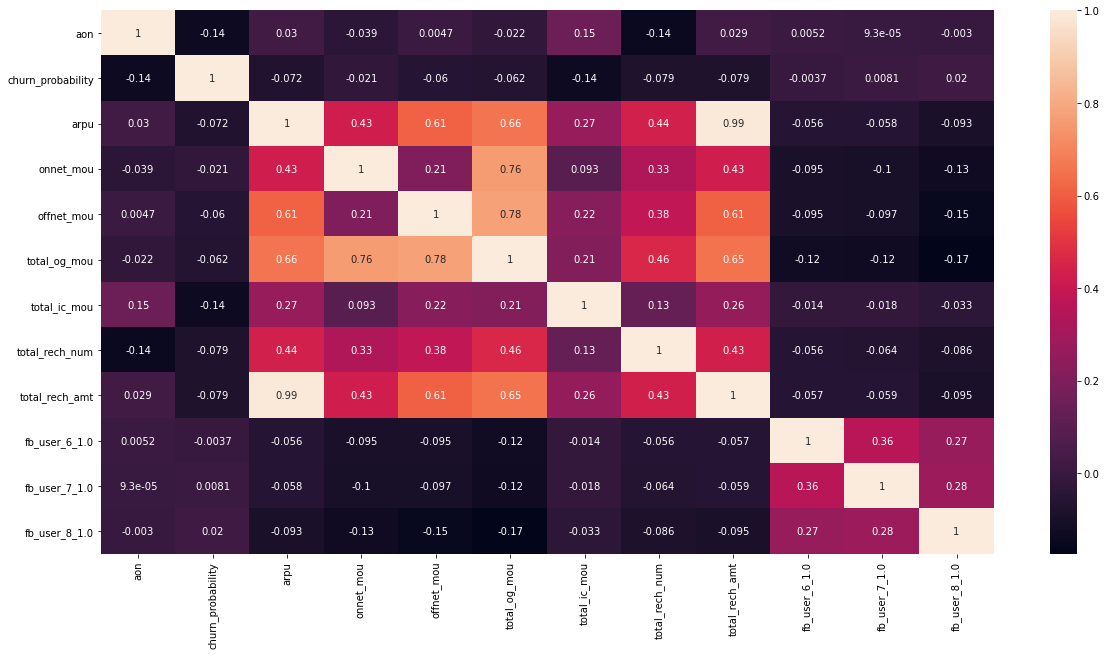

In [80]:
plt.figure(figsize = (20,10))
sns.heatmap(df_telecom.corr(),annot = True)
plt.show()

##### <b>Observations</b>
##### <li>'total_og_mou' has a high positive correlation with 'onnet_mou' and 'offnet_mou'.</li>
##### <li>'arpu' has a very high positive correlation with 'total_rech_amt'.</li>
##### <li>Hence dropping the features 'total_og_mou' and 'arpu'</li>

In [81]:
df_telecom.drop(columns=['total_og_mou','arpu'],inplace=True)
df_telecom_unseen.drop(columns=['total_og_mou','arpu'],inplace=True)

##### <li>Re-plotting the correlation matrix:</li>

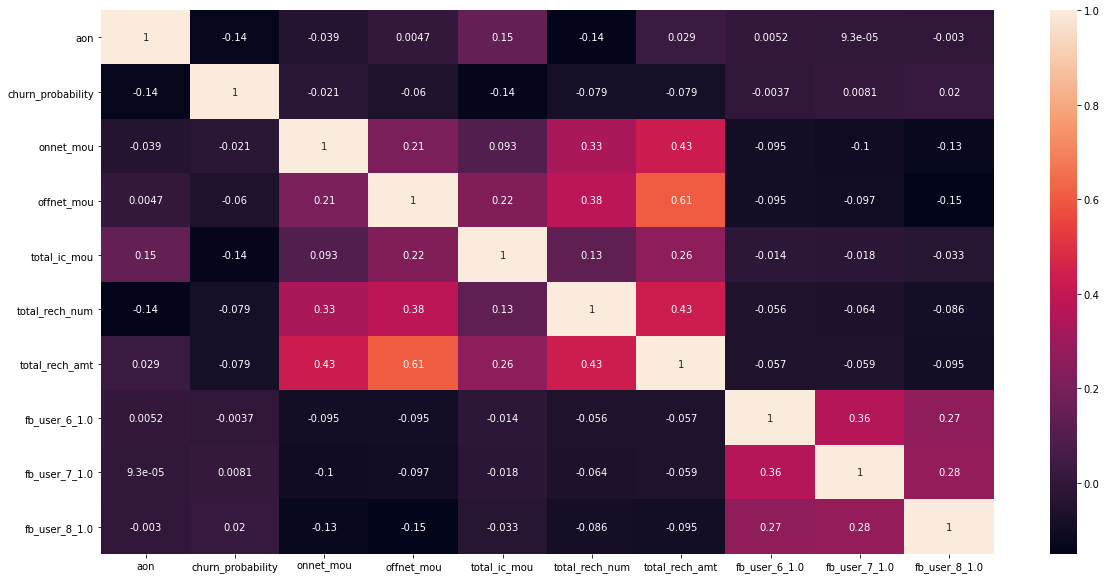

In [82]:
plt.figure(figsize = (20,10))
sns.heatmap(df_telecom.corr(),annot = True)
plt.show()

##### <li>Splitting the data into train and test data sets and scaling the numeric data type features:</li>

In [83]:
df_telecom.shape

(69999, 10)

In [84]:
y=df_telecom.pop('churn_probability')
x=df_telecom

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

In [86]:
telecom_numeric_cols = x_train.select_dtypes(include=['int64','float64']).columns

scaler=StandardScaler()
x_train[telecom_numeric_cols]=scaler.fit_transform(x_train[telecom_numeric_cols])


In [87]:
x_train.head()

,aon,onnet_mou,offnet_mou,total_ic_mou,total_rech_num,total_rech_amt,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
48645,-0.079445,-0.467012,-0.596671,-0.682119,0.351668,-0.585318,1,1,1
54979,-0.475246,-0.267816,-0.570368,0.978442,-0.675190,-0.559225,1,1,1
7134,2.273316,1.325063,1.192962,0.414823,0.567848,0.981997,1,1,1
6361,0.034991,-0.395733,-0.328339,-0.198632,-0.837325,-0.344393,1,1,1
6647,2.097988,-0.451338,-0.201895,0.268247,-0.837325,-0.604453,1,1,1


In [88]:
x_test[telecom_numeric_cols]=scaler.transform(x_test[telecom_numeric_cols])
x_test.head()

,aon,onnet_mou,offnet_mou,total_ic_mou,total_rech_num,total_rech_amt,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
3425,-0.393356,0.207319,0.307427,-0.634209,0.189532,-0.253068,1,1,1
33067,-0.399655,0.451684,1.313510,0.132212,0.243578,0.819351,1,1,0
52420,-0.462647,-0.306578,-0.584689,-0.722135,-0.675190,-0.524434,1,1,1
5220,2.121085,-0.470869,-0.664614,-0.688397,-0.729235,-0.697517,1,1,1
33958,0.804547,-0.401119,-0.283615,-0.617191,-0.513054,-0.703606,1,1,1


##### Checking the distribution of the target feature 'churn_probability':

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

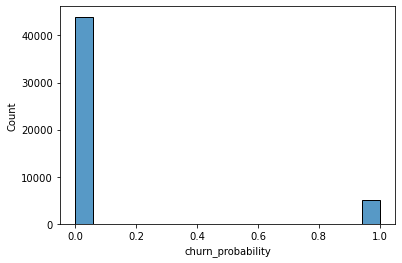

In [89]:
sns.histplot(y_train)

##### <li>A class imbalance is present here. This should be addressed using techniqueS such as oversampling and undersampling:</li>

## Step 2: Model building using principal component analysis(PCA) with logistic regression for the Kaggle competition.

##### <li>Using oversampling technique first:</li>

In [90]:

X=pd.concat([x_train,y_train],axis=1)

# separate minority and majority classes
not_churn = X[X.churn_probability==0]
churn = X[X.churn_probability==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=100) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])
y_train1=upsampled['churn_probability']
x_train1=upsampled.loc[ : , upsampled.columns != 'churn_probability']
# check new class counts
upsampled.churn_probability.value_counts()


0    43966
1    43966
Name: churn_probability, dtype: int64

##### <li>Calculating the performance of the logistic regression model built for a cluster of size 9, with oversampling(upsampling) applied to the test data:</li>

In [91]:

# for i in range(5,10):
pca_log1 = IncrementalPCA(n_components=9)
df_train_pca=pca_log1.fit_transform(x_train1)
df_test_pca=pca_log1.transform(x_test)
pca_log_1 = LogisticRegression(solver='liblinear')
model_pca_1=pca_log_1.fit(df_train_pca,y_train1)
y_pred_test=model_pca_1.predict(df_test_pca)

print(f"Accuracy of logistic regression model after upsampling: {metrics.accuracy_score(y_test,y_pred_test)}")
print(f"F1 score of logistic regression model after upsampling: {metrics.f1_score(y_test,y_pred_test)}")
print(f"Recall of logistic regression model after upsampling: {metrics.recall_score(y_test,y_pred_test)}")

Accuracy of logistic regression model after upsampling: 0.6038095238095238
F1 score of logistic regression model after upsampling: 0.27399650959860383
Recall of logistic regression model after upsampling: 0.7479752262982372


##### <li>Checking if the performance is better using downsampling</li>

In [92]:
# downsample majority
not_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn), # match minority n
                                random_state = 100) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_churn_downsampled, churn])

# checking counts
downsampled.churn_probability.value_counts()

0    5033
1    5033
Name: churn_probability, dtype: int64

In [93]:
y_train2 = downsampled.churn_probability
x_train2 = downsampled.loc[ : , upsampled.columns != 'churn_probability']

pca_log2 = IncrementalPCA(n_components=9)
df_train_pca2=pca_log2.fit_transform(x_train2)
df_test_pca2=pca_log2.transform(x_test)
pca_log_2 = LogisticRegression(solver='liblinear')
model_pca_2=pca_log_2.fit(df_train_pca2,y_train2)
y_pred_test=model_pca_2.predict(df_test_pca2)


print(f"Accuracy of logistic regression model after downsampling: {metrics.accuracy_score(y_test,y_pred_test)}")
print(f"F1 score of logistic regression model after downsampling: {metrics.f1_score(y_test,y_pred_test)}")
print(f"Recall of logistic regression model after downsampling: {metrics.recall_score(y_test,y_pred_test)}")

Accuracy of logistic regression model after downsampling: 0.6029047619047619
F1 score of logistic regression model after downsampling: 0.2732897603485839
Recall of logistic regression model after downsampling: 0.7470223916150548


##### <li>The model built using upsampling and downsampling have a similar accuracy,F1 score and recall . So in this case, we will consider the model built using PCA + logistic regression + upsampling (oversampling) to predict the output on the unseen data (for upload to Kaggle):</li>

In [94]:
df_telecom_unseen.columns

Index(['aon', 'onnet_mou', 'offnet_mou', 'total_ic_mou', 'total_rech_num',
       'total_rech_amt', 'fb_user_6_1.0', 'fb_user_7_1.0', 'fb_user_8_1.0'],
      dtype='object')

In [95]:
submission=df_telecom_unseen
df_telecom_unseen['churn_probability']=model_pca_1.predict(submission)
output=pd.concat([output,df_telecom_unseen['churn_probability']],axis=1)
output.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [96]:
output.to_csv('submission_log.csv',index=False)


## Step 3: Model building using principal component analysis(PCA) with random forests for the Kaggle competition.

##### <li>Building random forest models based on both upsampling and downsampling, and using the best model to predict the 'churn_probability' on unseen data:</li>

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train1,y_train1)
print(f"Best accuracy score for a random forest model with upsampling done: {grid_search.best_score_}")                           

In [97]:
pca_rf1=IncrementalPCA(n_components=9)
df_train_pca3=pca_rf1.fit_transform(x_train1)
df_test_pca3=pca_rf1.transform(x_test)

rf1 = RandomForestClassifier(n_estimators=10, max_depth=2, max_features=9, random_state=42, oob_score=True)
model_pca_3=rf1.fit(df_train_pca3,y_train1)
y_pred_test=model_pca_3.predict(df_test_pca3)

print(f"Accuracy of random forest model after upsampling: {metrics.accuracy_score(y_test,y_pred_test)}")
print(f"F1 score of random forest model after upsampling: {metrics.f1_score(y_test,y_pred_test)}")
print(f"Recall of random forest model after upsampling: {metrics.recall_score(y_test,y_pred_test)}")


Accuracy of random forest model after upsampling: 0.6325714285714286
F1 score of random forest model after upsampling: 0.28369847753434835
Recall of random forest model after upsampling: 0.7279656979514054


In [98]:
pca_rf2=IncrementalPCA(n_components=9)
df_train_pca4=pca_rf2.fit_transform(x_train2)
df_test_pca4=pca_rf2.transform(x_test)

rf2 = RandomForestClassifier(n_estimators=10, max_depth=2, max_features=9, random_state=42, oob_score=True)
model_pca_4=rf2.fit(df_train_pca4,y_train2)
y_pred_test=model_pca_4.predict(df_test_pca4)

print(f"Accuracy of random forest model after downsampling: {metrics.accuracy_score(y_test,y_pred_test)}")
print(f"F1 score of random forest model after downsampling: {metrics.f1_score(y_test,y_pred_test)}")
print(f"Recall of random forest model after downsampling: {metrics.recall_score(y_test,y_pred_test)}")


Accuracy of random forest model after downsampling: 0.575047619047619
F1 score of random forest model after downsampling: 0.2639392939623887
Recall of random forest model after downsampling: 0.7622677465459743


##### <li>A random forest with upsampled training data gives a better accuracy compared to a similar model trained with downsampled data. Hence predicting the output using the model with the better accuracy:</li>

In [99]:
submission=df_telecom_unseen.loc[ : , df_telecom_unseen.columns != 'churn_probability']
df_telecom_unseen['churn_probability']=model_pca_3.predict(submission)
output2=pd.concat([output2,df_telecom_unseen['churn_probability']],axis=1)
output2.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [100]:
output2.to_csv('submission_rf.csv',index=False)


## Step 4: Model performance comparison and selection of the best performing model  for the Kaggle competition.

##### <li>The best score in the Kaggle portal so far, was obtained by the predictions generated using the classification model built using <b><u>random forest classifier with PCA and oversampled training data</b></u> and is equal to <b><u>0.89923</b></u></li>


## Step 5: Model building using logistic regression(without PCA).


##### <li>Creating a logistic regression model with hyperparameter tuning, with the oversampled training data:</li>

In [101]:

log = LogisticRegression()
grid_param={"C":np.logspace(-3,3,7)}
log_cv_oversample=GridSearchCV(log,grid_param,scoring="accuracy",n_jobs=-1,cv=10)
log_cv_oversample.fit(x_train1,y_train1)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [102]:
log_cv_oversample_best = log_cv_oversample.best_estimator_
y_log_oversample_pred = log_cv_oversample_best.predict(x_test)


Metrics of a logistic regression model built with oversampled training data:
Best training accuracy score:0.6690057044725215
Test accuracy:0.6037142857142858
Precision:0.16768129872903983
Recall:0.7479752262982372
F1 score:0.2739487000523469
Confusion matrix:


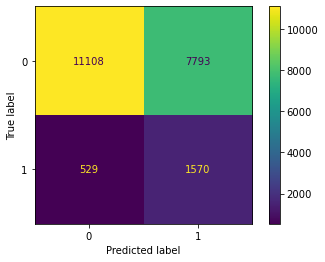

In [103]:

print("Metrics of a logistic regression model built with oversampled training data:")
print(f"Best training accuracy score:{log_cv_oversample.best_score_}")
print(f"Test accuracy:{metrics.accuracy_score(y_test,y_log_oversample_pred)}")
print(f"Precision:{metrics.precision_score(y_test,y_log_oversample_pred)}")
print(f"Recall:{metrics.recall_score(y_test,y_log_oversample_pred)}")
print(f"F1 score:{metrics.f1_score(y_test,y_log_oversample_pred)}")
print(f"Confusion matrix:")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_log_oversample_pred)).plot()
plt.show()

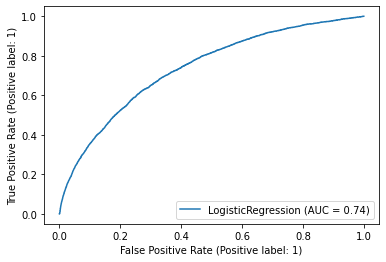

In [104]:

plot_roc_curve(log_cv_oversample_best,x_train1,y_train1)
plt.show()

##### <li>Creating a logistic regression model, with hyperparameter tuning, on the undersampled training data:</li>

In [105]:
log = LogisticRegression()
grid_param={"C":np.logspace(-3,3,7)}
log_cv_undersample=GridSearchCV(log,grid_param,scoring="accuracy",n_jobs=-1,cv=10)
log_cv_undersample.fit(x_train2,y_train2)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [106]:
log_cv_undersample_best = log_cv_undersample.best_estimator_
y_log_undersample_pred = log_cv_undersample_best.predict(x_test)


Metrics of a logistic regression model built with undersampled training data:
Best training accuracy score:0.6601427186631945
Test accuracy:0.6023809523809524
Precision:0.16668444065266078
Recall:0.7446403049070986
F1 score:0.2723945625653538
Confusion matrix:


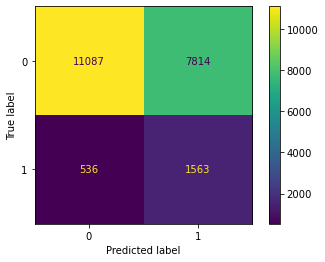

In [107]:
print("Metrics of a logistic regression model built with undersampled training data:")
print(f"Best training accuracy score:{log_cv_undersample.best_score_}")
print(f"Test accuracy:{metrics.accuracy_score(y_test,y_log_undersample_pred)}")
print(f"Precision:{metrics.precision_score(y_test,y_log_undersample_pred)}")
print(f"Recall:{metrics.recall_score(y_test,y_log_undersample_pred)}")
print(f"F1 score:{metrics.f1_score(y_test,y_log_undersample_pred)}")
print(f"Confusion matrix:")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_log_undersample_pred)).plot()
plt.show()

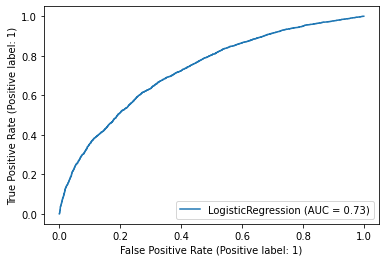

In [108]:
plot_roc_curve(log_cv_undersample_best,x_train2,y_train2)
plt.show()

#### <b><u>Observations and interpretation:</u></b>
##### <li>The models developed using logistic regression have a healthy recall value i.e. approximately 75% of all customers predicted as 'Churn' actually churned, although this could be a lot better.</li>
##### <li>The models have a test accuracy of approximately 60.3%, but there is room for improvement.</li>
##### <li>The model has a precision value of 16.6% indicating that only 16.6% of all cases predicted as 'Churn' will actually churn. As a business strategy, if it does not matter to roll out special offers to customers who will not actually churn, then this low precision value is acceptable.</li>
##### <li>The model has a healthy recall value of 74.8%, thus indicating that it predicts fewer number of customers (approximately 25%) who actually churn as 'Not Churn', and thereby minimizing the loss of customers due to incorrect prediction.
##### <li> The ROC curves above indicate a certain degreee of randomness (close to the y-axis but could be better).</li>

## Step 6: Model building using with random forest(without PCA).


##### <li>Creating a random forest based model with hyperparameter tuning, with the oversampled training data:</li>

In [109]:

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_params= {
    'max_depth': [2,3],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50]
}
rf_grid_oversampling = GridSearchCV(estimator=rf,
                           param_grid=grid_params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
rf_grid_oversampling.fit(x_train1,y_train1)
                           

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [110]:
rf_cv_oversample_best = rf_grid_oversampling.best_estimator_
y_rf_oversample_pred = rf_cv_oversample_best.predict(x_test)


Metrics of a random forest classification model built with oversampled training data:
Best training accuracy score:0.6920916162489197
Test accuracy:0.7282380952380952
Precision:0.21080474511061237
Recall:0.6264888041924727
F1 score:0.31546119707328774
Confusion matrix:


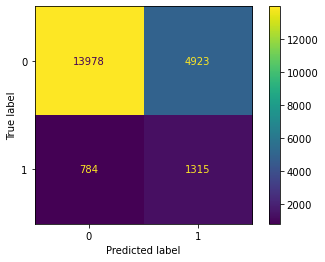

In [111]:

print("Metrics of a random forest classification model built with oversampled training data:")
print(f"Best training accuracy score:{rf_grid_oversampling.best_score_}")
print(f"Test accuracy:{metrics.accuracy_score(y_test,y_rf_oversample_pred)}")
print(f"Precision:{metrics.precision_score(y_test,y_rf_oversample_pred)}")
print(f"Recall:{metrics.recall_score(y_test,y_rf_oversample_pred)}")
print(f"F1 score:{metrics.f1_score(y_test,y_rf_oversample_pred)}")
print(f"Confusion matrix:")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_rf_oversample_pred)).plot()
plt.show()

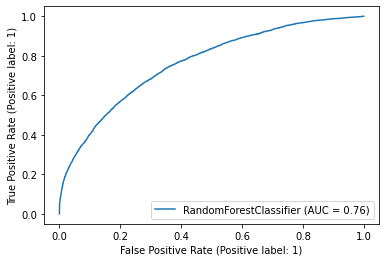

In [112]:
plot_roc_curve(rf_cv_oversample_best,x_train1,y_train1)
plt.show()

In [113]:
rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_params= {
    'max_depth': [2,3],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50]
}
rf_grid_undersampling = GridSearchCV(estimator=rf2,
                           param_grid=grid_params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
rf_grid_undersampling.fit(x_train2,y_train2)
                           

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

Metrics of a random forest classification model built with oversampled training data:
Best training accuracy score:0.6812036261529706
Test accuracy:0.7102857142857143
Precision:0.2015875393140632
Recall:0.6412577417818008
F1 score:0.3067456700091158
Confusion matrix:


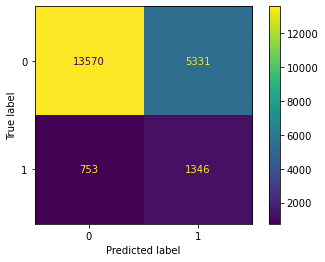

In [114]:
rf_cv_undersample_best = rf_grid_undersampling.best_estimator_
y_rf_undersample_pred = rf_cv_undersample_best.predict(x_test)
print("Metrics of a random forest classification model built with oversampled training data:")
print(f"Best training accuracy score:{rf_grid_undersampling.best_score_}")
print(f"Test accuracy:{metrics.accuracy_score(y_test,y_rf_undersample_pred)}")
print(f"Precision:{metrics.precision_score(y_test,y_rf_undersample_pred)}")
print(f"Recall:{metrics.recall_score(y_test,y_rf_undersample_pred)}")
print(f"F1 score:{metrics.f1_score(y_test,y_rf_undersample_pred)}")
print(f"Confusion matrix:")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_rf_undersample_pred)).plot()
plt.show()

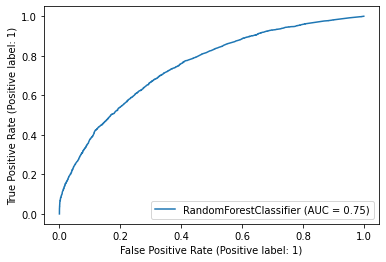

In [115]:
plot_roc_curve(rf_cv_undersample_best,x_train2,y_train2)
plt.show()

#### <b><u>Observations and interpretation:</u></b>
##### <li>The models developed using random forest classification have a recall value of ranging from approximately 62 to 64% i.e. 62 to 64% of all customers who were predicted as 'Churn' actually churned.</li>
##### <li>The models have a test accuracies ranging from approximately 71 to 73%, but more number of 'Not Churn' cases are predicted correctly in comparison to 'Churn' cases.</li>
##### <li>The model has precision values ranging from 20 to 21%, but it does not matter if the business strategy is okay with false positives.</li>
##### <li>The model has recall values ranging from  62 to 64%, thus indicating that it predicts approximately 25% who actually churn as 'Not Churn'</li>
##### <li> The ROC curves above indicate a certain degreee of randomness (close to the y-axis but could be better).</li>

## Step 7: Important variable identification.</ol>

#### <b><u>Model selection strategy:</u></b>
##### The classification model built using <b><u>logistic regression (without PCA) using oversampling</b></u> has been chosen as the best model from the above created models (without PCA) for the following reasons:
##### <li>Assuming that the telecom company does not face any significant financial loss by rolling out special offers to customers who have been wrongly identified as 'Churn' but are more likely to or acutally 'Not Churn' (false positives), then the focus of the company must be on reducing the number of customers who are wrongly identified as 'Not Churn' but actually 'Churn' (false negatives).</li>
##### <li> Thus the model must have an acceptable accuracy value and a good recall value(lower number of false negatives) , since the priority is to minimize the loss of customers i.e. 'Churn'</li>
##### <li> Hence the above classification model has been chosen, which has a test accuracy of <b><u>0.6037</b></u>(60.37%) and a precision of <b><u>0.7480</b></u>(74.8%).

##### <li> Finding the list of most important features that are strong predictors of customer churn, using this model:</li>

In [116]:
df_imp = pd.DataFrame({
    "Feature": x_train1.columns,
    "Importance": log_cv_oversample_best.coef_[0]
})
df_imp.sort_values(by="Importance", ascending=False, inplace=True)

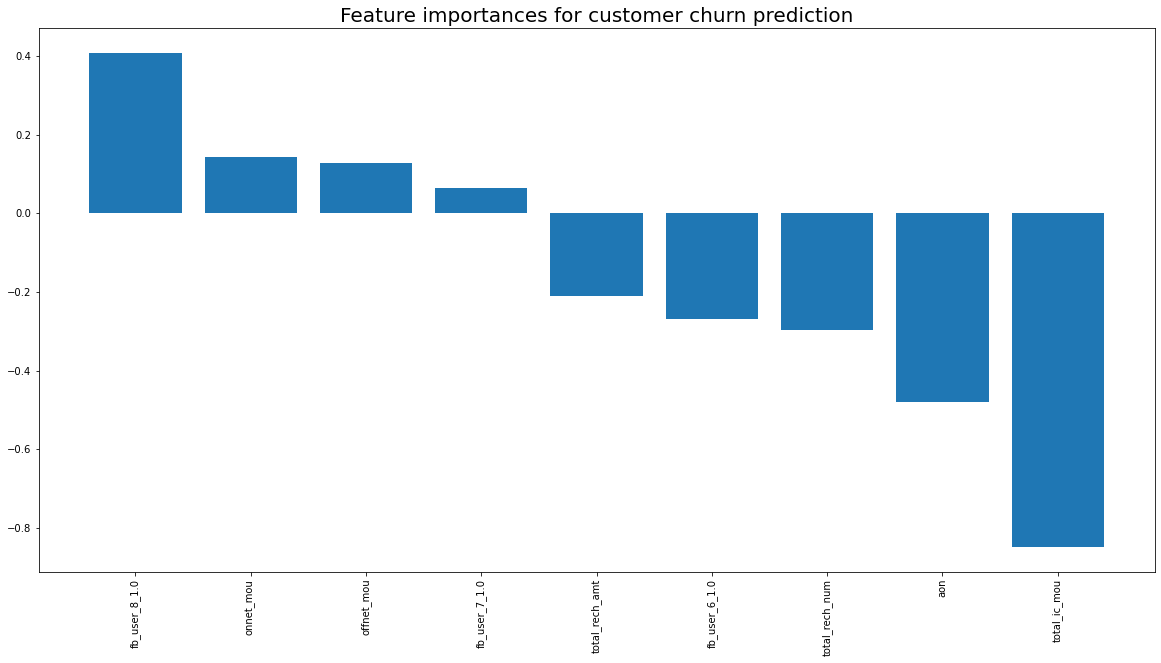

In [117]:
plt.figure(figsize=(20, 10))
plt.bar(x=df_imp['Feature'], height=df_imp['Importance'])
plt.title('Feature importances for customer churn prediction', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
print(df_imp)

          Feature  Importance
8   fb_user_8_1.0    0.407236
1       onnet_mou    0.141772
2      offnet_mou    0.126815
7   fb_user_7_1.0    0.064724
5  total_rech_amt   -0.210177
6   fb_user_6_1.0   -0.269490
4  total_rech_num   -0.297042
0             aon   -0.479482
3    total_ic_mou   -0.847918


##### <li>Creating the output 'Submission.csv' file, to predict the outcome for the observations in the 'test.csv' file, using the above selected model:</li>

In [119]:
submission=df_telecom_unseen.loc[ : , df_telecom_unseen.columns != 'churn_probability']
df_telecom_unseen['churn_probability']=log_cv_oversample_best.predict(submission)
output_log=pd.concat([output_log,df_telecom_unseen['churn_probability']],axis=1)
output_log.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [120]:

output_log.to_csv('Submission.csv',index=False)


### <b><u>Final observations and business inferences:</u></b>
#### 1. The customers who use social media and thus the mobile internet in the month of August, are more likely to churn. Thus, the telecom company should look into why such users are likely to churn. Some factors to consider could be the network quality, mobile internet speed, holiday season, better offers from competitors during that particular time period etc. The company can then work on effective strategies based on the same, to retain existing customers.
#### 2. The customers are also more likely to churn:
#####   <li>when the minutes of usage of incoming calls is very less.</li>
#####   <li>when they have been in the network for fewer days. Older customers are less likely to churn</li>
#####   <li>when the total number of recharges are fewer.</li>
#####   <li>when the total recharge amount is lesser.</li>

#### The telecom network operator must target such customers with special offers, marketing campaigns and also capture the feedback from the past customers who churned, and use this feedback to improve the quality of the services provided and thereby minimize customer churn.